## Análise de Dados sobre crimes de transitos
#### Relação de acidentes de trânsito ocorridos no Rio Grande do Sul (RS), Brasil.

#### Carregar bibliotecas utilizadas na análise

In [1]:
%pylab inline
import dateutil.parser as parser
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


#### Criar determinadas funções para obter informações nos dados analisados

In [2]:
def getYear(date):
    return parser.parse(date).year

def getMonth(date):
    return parser.parse(date).month

def getDay(date):
    return parser.parse(date).day

def getHour(time):
    return time.split(':')[0]

def getMinute(time):
    return time.split(':')[1]

#### Carregar dataset e exibir as primeiras informações contidas nela

In [3]:
dataset = pd.read_csv("dataset/crimestransito.csv")
dataset.head()

,Data,Hora,Municipio,Nro da Ocorrencia,Tipo de Via,Tipo Logradouro,Logradouro,KM,Natureza Ocorrencia,Tipo Ocorrencia,Historico,Teor Alcoolico,Falecimento Posterior,Ocorrencia Falecimento,Motorista Embriagado,Pedestre Embriagado,Veiculo Fugou,Motorista sem CNH
0,14/06/2011,17:55,Sapiranga,5116,Municipal,Rua,KRAEMER ECK,2000,Colisão,Homicídio De Trânsito,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/11/2011,00:30,Osório,5116,Estadual,Rodovia,RS 101,8,Atropelamento,Homicídio De Trânsito,NaN,NaN,06/11/2011,NaN,NÃO INF.,N,N,NÃO INF.
2,30/07/2011,19:15,Barros Cassal,512,Municipal,Avenida,ZEFERINO BARBOSA,NaN,Colisão,Homicídio De Trânsito,NaN,NaN,30/07/2011,NaN,NaN,NaN,NaN,NaN
3,18/09/2011,19:40,Riozinho,5125,Municipal,Avenida,GUERINO PANDOLFO,233,Colisão,Homicídio De Trânsito,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28/05/2011,11:20,Casca,513,Estadual,Rodovia,RS 324,57,Colisão,Homicídio De Trânsito,NaN,NaN,28/05/2011,NaN,NaN,NaN,NaN,NaN


In [4]:
print ("Total de linhas no dataset: " + str(dataset.shape[0]))
print ("Total de colunas no dataset: " + str(dataset.shape[1]))

Total de linhas no dataset: 16016
Total de colunas no dataset: 18


#### Na próxima etapa, será verificada a quantidade de dados vazios em cada coluna

In [5]:
for col in list(dataset.columns.values):
    print ("Número de dados vázios na coluna " + col + ": " + str(dataset[col].isnull().values.sum()))

Número de dados vázios na coluna Data: 0
Número de dados vázios na coluna  Hora: 0
Número de dados vázios na coluna  Municipio: 0
Número de dados vázios na coluna  Nro da Ocorrencia: 0
Número de dados vázios na coluna  Tipo de Via: 58
Número de dados vázios na coluna  Tipo Logradouro: 127
Número de dados vázios na coluna  Logradouro: 150
Número de dados vázios na coluna  KM: 3473
Número de dados vázios na coluna  Natureza Ocorrencia: 0
Número de dados vázios na coluna  Tipo Ocorrencia: 1
Número de dados vázios na coluna  Historico: 16016
Número de dados vázios na coluna  Teor Alcoolico: 14906
Número de dados vázios na coluna  Falecimento Posterior: 7958
Número de dados vázios na coluna  Ocorrencia Falecimento: 11510
Número de dados vázios na coluna  Motorista Embriagado: 3183
Número de dados vázios na coluna  Pedestre Embriagado: 3184
Número de dados vázios na coluna  Veiculo Fugou: 3184
Número de dados vázios na coluna  Motorista sem CNH: 3170


#### Como a coluna Histórico não tem nenhuma informação, não há necessidade dela no dataset. Então, ela será removida

In [6]:
del dataset[" Historico"]
print ("Total de linhas no dataset: " + str(dataset.shape[0]))
print ("Total de colunas no dataset: " + str(dataset.shape[1]))

Total de linhas no dataset: 16016
Total de colunas no dataset: 17


#### Formatar a data e tempo da ocorrência para um formato de fácil manipulação, seperando as informações dia, mês, ano, hora e minuto de uma única coluna e os colocando em recipientes separados. 

In [7]:
dataset["Dia"] = dataset["Data"].apply(getDay)
dataset["Mes"] = dataset["Data"].apply(getMonth)
dataset["Ano"] = dataset["Data"].apply(getYear)
dataset["Hora"] = dataset[" Hora"].apply(getHour)
dataset["Minuto"] = dataset[" Hora"].apply(getMinute)
del dataset["Data"]
del dataset[" Hora"]
dataset.head()

,Municipio,Nro da Ocorrencia,Tipo de Via,Tipo Logradouro,Logradouro,KM,Natureza Ocorrencia,Tipo Ocorrencia,Teor Alcoolico,Falecimento Posterior,Ocorrencia Falecimento,Motorista Embriagado,Pedestre Embriagado,Veiculo Fugou,Motorista sem CNH,Dia,Mes,Ano,Hora,Minuto
0,Sapiranga,5116,Municipal,Rua,KRAEMER ECK,2000,Colisão,Homicídio De Trânsito,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,6,2011,17,55
1,Osório,5116,Estadual,Rodovia,RS 101,8,Atropelamento,Homicídio De Trânsito,NaN,06/11/2011,NaN,NÃO INF.,N,N,NÃO INF.,11,6,2011,00,30
2,Barros Cassal,512,Municipal,Avenida,ZEFERINO BARBOSA,NaN,Colisão,Homicídio De Trânsito,NaN,30/07/2011,NaN,NaN,NaN,NaN,NaN,30,7,2011,19,15
3,Riozinho,5125,Municipal,Avenida,GUERINO PANDOLFO,233,Colisão,Homicídio De Trânsito,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,9,2011,19,40
4,Casca,513,Estadual,Rodovia,RS 324,57,Colisão,Homicídio De Trânsito,NaN,28/05/2011,NaN,NaN,NaN,NaN,NaN,28,5,2011,11,20


### Quais os municipios do RS com maior número de ocorrências no trânsito nos últimos 5 anos?

In [8]:
top_municipios = dataset[dataset['Ano'] > 2010][dataset['Ano'] <= 2015].groupby([" Municipio"]).size().sort_values(ascending=0)
top_municipios[0:10]

 Municipio
Porto Alegre     676
Pelotas          272
Caxias do Sul    248
Viamão           200
Gravataí         199
Passo Fundo      182
Santa Maria      182
Rio Grande       181
Canoas           156
Novo Hamburgo    143
dtype: int64

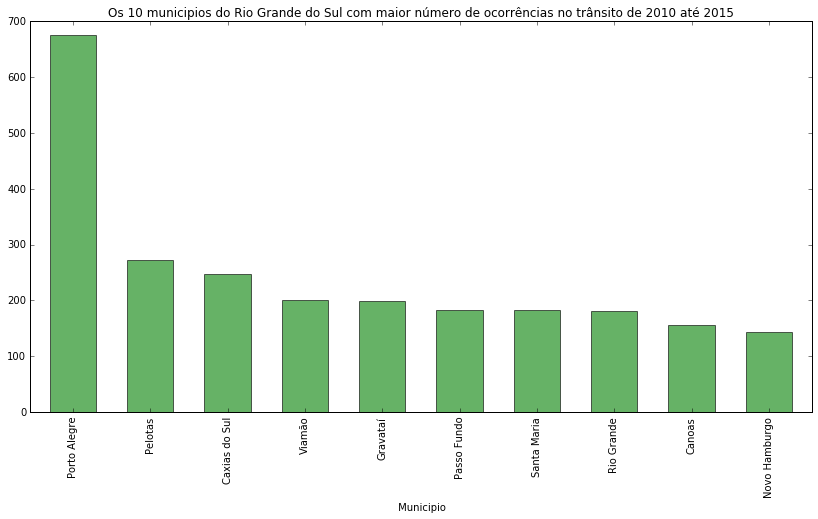

In [9]:
titulo = "Os 10 municipios do Rio Grande do Sul com maior número de ocorrências no trânsito de 2010 até 2015"
top_municipios[0:10].plot(kind='bar', figsize=[14, 7],width=0.6,alpha=0.6,color='g',grid=False,title=titulo) 

### Quais os Tipos de Ocorrências que mais ocorreram no RS em 2015?

In [10]:
natureza_ocorrencia_2015 = dataset[dataset['Ano'] == 2015].groupby([" Natureza Ocorrencia"]).size().sort_values(ascending=0)
print(natureza_ocorrencia_2015)

 Natureza Ocorrencia
Colisão                   570
Atropelamento             351
Colisão Lateral           181
Choque Com Objeto Fixo    172
Tombamento                126
Capotagem                  96
Não Informado              19
Outro                      16
dtype: int64


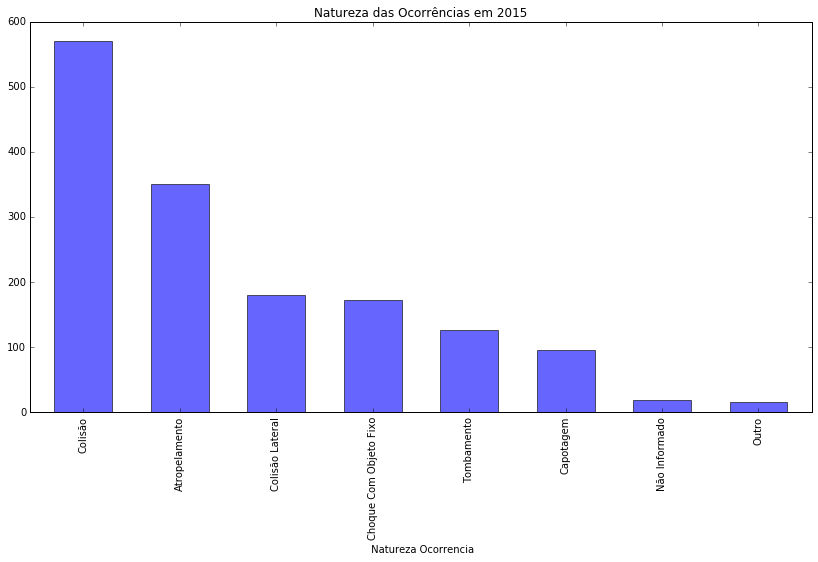

In [11]:
titulo = "Natureza das Ocorrências em 2015"
natureza_ocorrencia_2015.plot(kind='bar', figsize=[14, 7],width=0.6,alpha=0.6,color='b',grid=False,title=titulo) 

### Qual a frequência das ocorrências nos últimos 5 anos?

In [12]:
ocorrencias = dataset[dataset['Ano'] > 2010][dataset['Ano'] <= 2015].groupby(["Ano", " Natureza Ocorrencia"]).size()
print (ocorrencias)

Ano    Natureza Ocorrencia  
2011  Atropelamento             409
      Capotagem                 112
      Choque Com Objeto Fixo    207
      Colisão                   734
      Colisão Lateral           157
      Não Informado              21
      Outro                      44
      Tombamento                147
2012  Atropelamento             398
      Capotagem                 114
      Choque Com Objeto Fixo    201
      Colisão                   728
      Colisão Lateral           223
      Não Informado              15
      Outro                      37
      Tombamento                138
2013  Atropelamento             395
      Capotagem                 110
      Choque Com Objeto Fixo    179
      Colisão                   702
      Colisão Lateral           204
      Não Informado              29
      Outro                      29
      Tombamento                123
2014  Atropelamento             404
      Capotagem                 106
      Choque Com Objeto Fixo    188

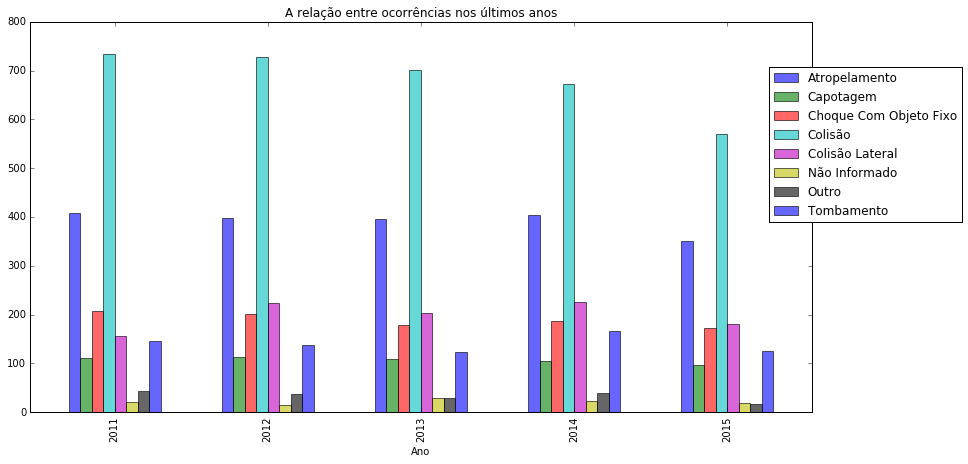

In [13]:
title = "A relação entre ocorrências nos últimos anos"

ocorrencias.unstack().plot(kind='bar', figsize=[14, 7],width=0.6,alpha=0.6,grid=False,title=title).legend(bbox_to_anchor=(1.2, 0.9))

#### É possível verificar no gráfico acima, que anualmente a colisão é a ocorrência com mair quantidade de registros, seguido de atropelamento. Também, é possível verificar que no decorrer dos anos, ambos estão diminuindo.

### Quais os Tipos de Vias que mais tiveram colisão nos últimos anos 5 anos?

In [14]:
ocorrencia_tipo_vias = dataset[dataset['Ano'] > 2010][dataset['Ano'] <= 2015][dataset[' Natureza Ocorrencia'] == 'Colisão'].groupby([' Tipo de Via']).size().sort_values(ascending=0)
print (ocorrencia_tipo_vias)

 Tipo de Via
Estadual     1262
Federal      1145
Municipal     999
dtype: int64


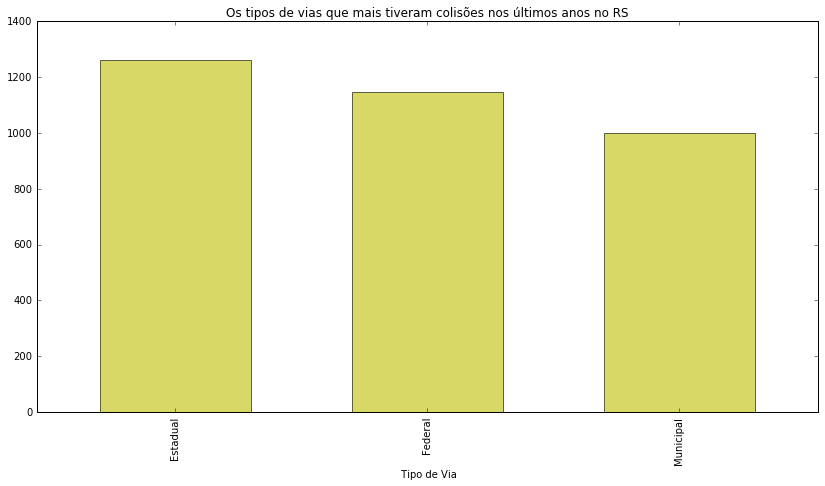

In [16]:
title = "Os tipos de vias que mais tiveram colisões nos últimos anos no RS"
ocorrencia_tipo_vias.plot(kind='bar',figsize=[14, 7],width=0.6,alpha=0.6,color='y',grid=False,title=title)